In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

In [ ]:
params_dir = "/content/params.yaml"

In [ ]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)

    return params

In [ ]:
params = load_params(params_dir)

In [ ]:
params

{'dataset_dir': '/content/data/',
 'datetime_columns': ['tanggal'],
 'int32_columns': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'label': 'categori',
 'label_categories': ['BAIK', 'SEDANG', 'TIDAK SEHAT'],
 'label_categories_new': ['BAIK', 'TIDAK BAIK'],
 'missing_value_co': 11,
 'missing_value_no2': 18,
 'missing_value_o3': 29,
 'missing_value_pm10': {'BAIK': 28, 'TIDAK BAIK': 55},
 'missing_value_pm25': {'BAIK': 38, 'TIDAK BAIK': 82},
 'missing_value_so2': 35,
 'object_columns': ['stasiun', 'critical', 'categori'],
 'predictors': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'range_co': [-1, 100],
 'range_no2': [-1, 100],
 'range_o3': [-1, 160],
 'range_pm10': [-1, 800],
 'range_pm25': [-1, 400],
 'range_so2': [-1, 500],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta Barat']}

In [ ]:
x_train = joblib.load("/content/x_train.pkl")
y_train = joblib.load("/content/y_train.pkl")

In [ ]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
1393,DKI1 (Bunderan HI),66,94,30,15,20,28
675,DKI3 (Jagakarsa),28,52,26,5,35,7
1288,DKI3 (Jagakarsa),26,42,24,9,35,12
1347,DKI5 (Kebon Jeruk) Jakarta Barat,23,50,36,6,10,13
1035,DKI4 (Lubang Buaya),-1,98,45,7,33,12
...,...,...,...,...,...,...,...
1108,DKI2 (Kelapa Gading),60,79,53,11,54,17
439,DKI5 (Kebon Jeruk) Jakarta Barat,54,92,29,11,25,25
287,DKI5 (Kebon Jeruk) Jakarta Barat,46,75,-1,14,29,40
953,DKI2 (Kelapa Gading),62,79,50,9,37,18


In [ ]:
y_train

1393    BAIK
675     BAIK
1288    BAIK
1347    BAIK
1035    BAIK
        ... 
1108    BAIK
439     BAIK
287     BAIK
953     BAIK
1420    BAIK
Name: categori, Length: 1266, dtype: object

In [ ]:
df = pd.concat([x_train, y_train], axis = 1)

In [ ]:
df

,stasiun,pm10,pm25,so2,co,o3,no2,categori
1393,DKI1 (Bunderan HI),66,94,30,15,20,28,BAIK
675,DKI3 (Jagakarsa),28,52,26,5,35,7,BAIK
1288,DKI3 (Jagakarsa),26,42,24,9,35,12,BAIK
1347,DKI5 (Kebon Jeruk) Jakarta Barat,23,50,36,6,10,13,BAIK
1035,DKI4 (Lubang Buaya),-1,98,45,7,33,12,BAIK
...,...,...,...,...,...,...,...,...
1108,DKI2 (Kelapa Gading),60,79,53,11,54,17,BAIK
439,DKI5 (Kebon Jeruk) Jakarta Barat,54,92,29,11,25,25,BAIK
287,DKI5 (Kebon Jeruk) Jakarta Barat,46,75,-1,14,29,40,BAIK
953,DKI2 (Kelapa Gading),62,79,50,9,37,18,BAIK


### 3.1. Cek Missing Value

In [ ]:
# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
df.replace(-1, np.nan, inplace = True)

In [ ]:
# cek null value
df.isnull().sum()

stasiun      0
pm10        35
pm25        55
so2         75
co          11
o3          35
no2         14
categori     0
dtype: int64

pada dataset raw terdapat beberapa missing value atau data yang kosong.

sebelum melakukan treatment pada data yang kosong tersebut. ada baiknya melihat keadaan datanya saat ini

### 3.2. Cek Informasi Statistik

In [ ]:
# cek skewness
df.skew(numeric_only = True)

pm10    0.228964
pm25    0.198516
so2     0.182539
co      1.351131
o3      1.415873
no2     0.977480
dtype: float64

kolom co, o3 dan no2 > +- 0.5 yang menandakan skew, maka dari itu kolom tersebut akan diimputasi dengan median

kolom lainnya akan diimputasi dengan mean karena mendekati normal distribution

In [ ]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
df_baik = df[df.categori == "BAIK"].copy()
df_tidak_baik = df[df.categori != "BAIK"].copy()

In [ ]:
df_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1047.000000,1021.000000,1005.000000,1066.000000,1045.000000,1062.000000
mean,48.976122,71.507346,34.098507,11.420263,31.546411,18.952919
std,12.774572,17.547895,12.988320,4.579370,14.589235,9.482642
min,14.000000,13.000000,2.000000,2.000000,7.000000,3.000000
25%,40.000000,60.000000,24.000000,8.000000,21.000000,12.000000
50%,52.000000,74.000000,32.000000,11.000000,28.000000,17.000000
75%,58.000000,85.000000,43.000000,14.000000,39.000000,24.000000
max,87.000000,100.000000,81.000000,38.000000,93.000000,65.000000


In [ ]:
df_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,184.000000,190.000000,186.000000,189.000000,186.000000,190.000000
mean,70.739130,113.363158,40.709677,13.904762,33.188172,23.684211
std,11.590339,13.642825,10.903588,5.665445,15.135856,8.394711
min,39.000000,58.000000,13.000000,4.000000,14.000000,9.000000
25%,64.000000,105.000000,35.000000,10.000000,24.250000,18.000000
50%,69.500000,110.000000,40.000000,13.000000,29.000000,22.000000
75%,75.000000,118.750000,46.750000,16.000000,37.000000,26.000000
max,179.000000,174.000000,82.000000,43.000000,151.000000,63.000000


- pm10      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
- pm25      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
- so2       : mean dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
- co        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
- o3        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
- no2       : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas

#### 3.2.3. Visualisasi untuk fitur PM10

In [ ]:
df['categori'].value_counts()

BAIK           1076
TIDAK SEHAT     190
Name: categori, dtype: int64

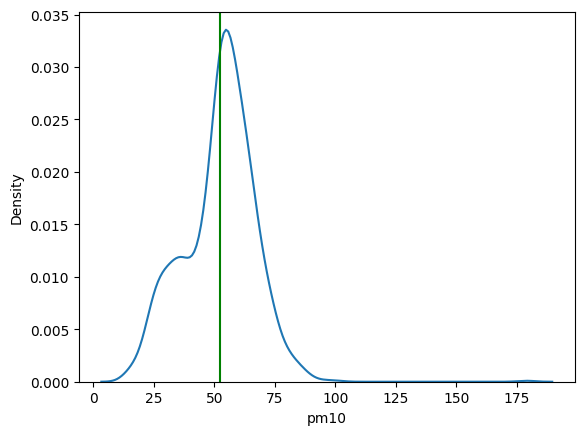

In [ ]:
# plot untuk melihat distribusi pm10 jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = df, x = "pm10")
plt.axvline(df.pm10.mean(), 0, 1, color = "g")

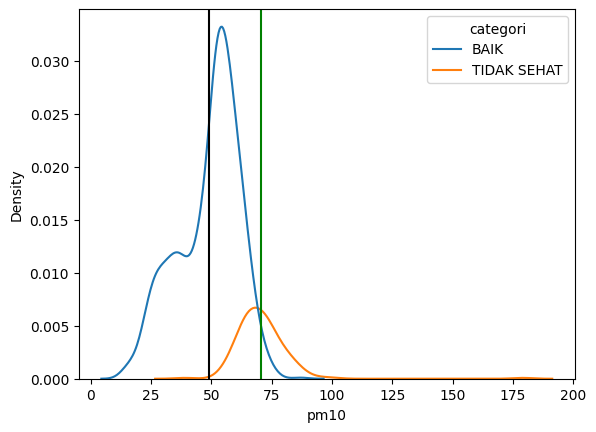

In [ ]:
# plot untuk melihat distribusi pm10 jika dibedakan berdasarkan categori
sns.kdeplot(data = df, x = "pm10", hue = "categori")
plt.axvline(df_tidak_baik.pm10.mean(), 0, 1, color = "g")
plt.axvline(df_baik.pm10.mean(), 0, 1, color = "k")

- distribusi sedikit skew ke kiri (nilai skew fisher-pearson negatif) namun tidak signifikan, imputasi mean
- mean 2 kelas tidak terlalu berbeda jauh, namun kita dapat imputasi berdasarkan kelas
- kesimpulan: untuk pm10 akan menggunakan mean dari perkelas untuk imputasi

#### 3.2.4. Visualisasi untuk fitur PM25

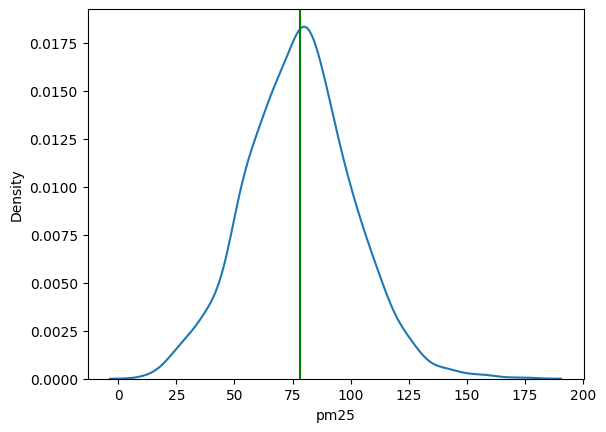

In [ ]:
sns.kdeplot(data = df, x = "pm25")
plt.axvline(df.pm25.mean(), 0, 1, color = "g")

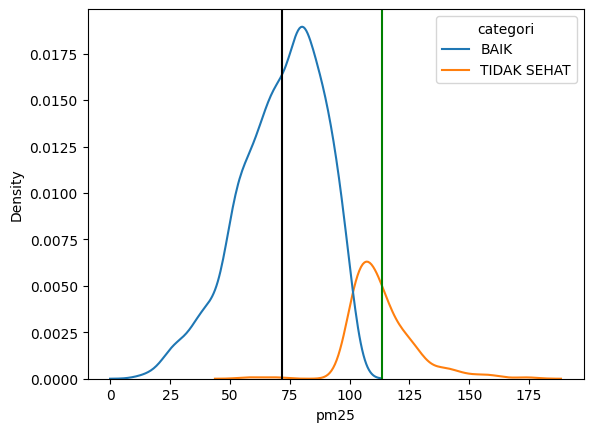

In [ ]:
sns.kdeplot(data = df, x = "pm25", hue = "categori")
plt.axvline(df_tidak_baik.pm25.mean(), 0, 1, color = "g")
plt.axvline(df_baik.pm25.mean(), 0, 1, color = "k")

- distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
- mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
- kesimpulan: untuk pm25 akan menggunakan mean dari perkelas untuk imputasi

#### 3.2.5. Visualisasi untuk fitur SO2

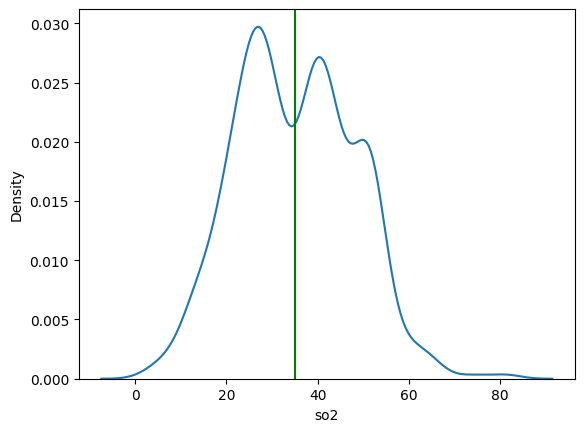

In [ ]:
sns.kdeplot(data = df, x = "so2")
plt.axvline(df.so2.mean(), 0, 1, color = "g")

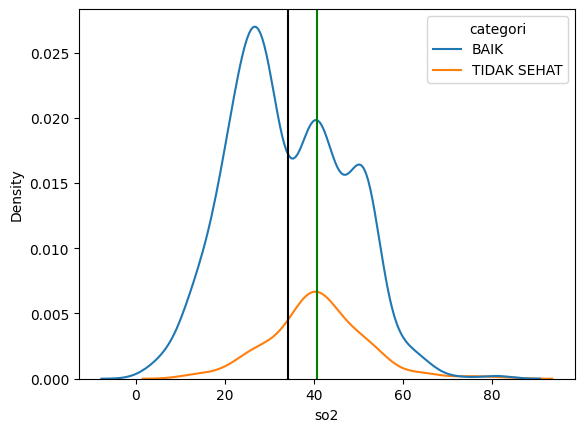

In [ ]:
sns.kdeplot(data = df, x = "so2", hue = "categori")
plt.axvline(df_tidak_baik.so2.mean(), 0, 1, color = "g")
plt.axvline(df_baik.so2.mean(), 0, 1, color = "k")

- distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
- mean 2 kelas berbeda jauh, imputasi secara keseluruhan kelas
- kesimpulan: untuk so2 akan menggunakan mean seluruh kelas untuk imputasi

#### 3.2.6. Visualisasi untuk fitur CO

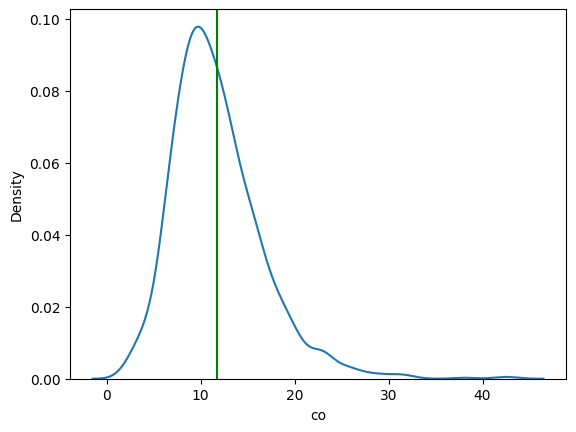

In [ ]:
sns.kdeplot(data = df, x = "co")
plt.axvline(df.co.mean(), 0, 1, color = "g")

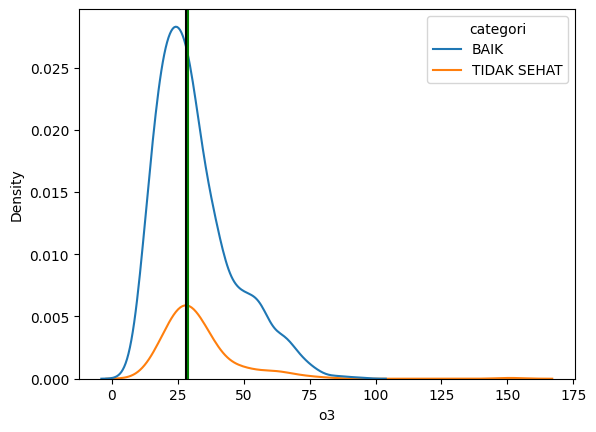

In [ ]:
sns.kdeplot(data = df, x = "o3", hue = "categori")
plt.axvline(df_tidak_baik.o3.median(), 0, 1, color = "g")
plt.axvline(df_baik.o3.median(), 0, 1, color = "k")

- distribusi sedikit skew ke kiri (nilai skew fisher-pearson positive) cukup signifikan, imputasi median
- median 2 kelas tidak terlalu berbeda jauh, namun kita imputuasi untuk keseluruhan kelas
- kesimpulan: untuk 03 akan menggunakan median untuk imputasi seluruh kelas

#### 3.2.8. Visualisasi untuk fitur NO2

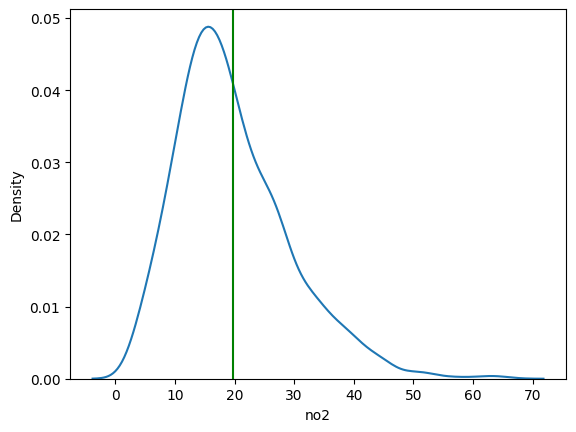

In [ ]:
sns.kdeplot(data = df, x = "no2")
plt.axvline(df.no2.mean(), 0, 1, color = "g")

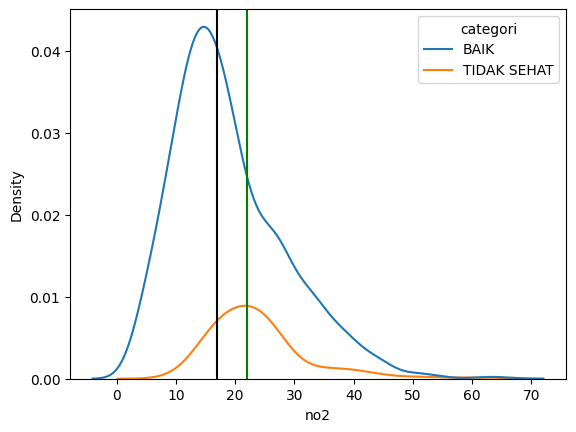

In [ ]:
sns.kdeplot(data = df, x = "no2", hue = "categori")
plt.axvline(df_tidak_baik.no2.median(), 0, 1, color = "g")
plt.axvline(df_baik.no2.median(), 0, 1, color = "k")

- distribusi sedikit skew ke kiri (nilai skew fisher-pearson positive) cukup signifikan, imputasi median
- median 2 kelas tidak terlalu berbeda jauh, namun kita imputuasi untuk keseluruhan kelas
- kesimpulan: untuk no2 akan menggunakan median untuk imputasi seluruh kelas

#### 3.2.9. Pearson Corrlation

<Axes: >

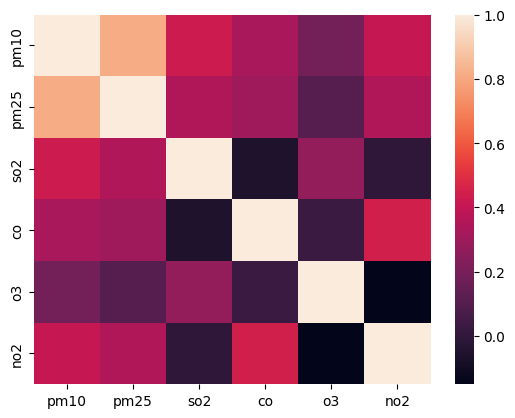

In [ ]:
sns.heatmap(df.corr(numeric_only = True))

#### 3.2.10. T Test untuk PM10

- h0    = mean pm10 untuk kelas 0 = mean pm10 untuk kelas 1
- h1    = mean pm10 untuk kelas 0 != mean pm10 untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.pm10.isnull() != True].pm10,
    df_tidak_baik[df_tidak_baik.pm10.isnull() != True].pm10
)

Ttest_indResult(statistic=-21.598288669944786, pvalue=5.817127681203351e-88)

In [ ]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(df) - 2))

-1.646060029911409

- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

#### 3.2.11. T Test untuk PM25

- h0    = mean pm25 untuk kelas 0 = mean pm25 untuk kelas 1
- h1    = mean pm25 untuk kelas 0 != mean pm25 untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.pm25.isnull() != True].pm25,
    df_tidak_baik[df_tidak_baik.pm25.isnull() != True].pm25
)

Ttest_indResult(statistic=-31.167997829049362, pvalue=5.152632047874556e-157)

In [ ]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(df) - 2))

-1.646060029911409

- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant

#### 3.2.12 T Test untuk SO2

- h0    = mean so2 untuk kelas 0 = mean so2 untuk kelas 1
- h1    = mean so2 untuk kelas 0 != mean so2 untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.so2.isnull() != True].so2,
    df_tidak_baik[df_tidak_baik.so2.isnull() != True].so2
)

Ttest_indResult(statistic=-6.528613660967165, pvalue=9.809520916599598e-11)

In [ ]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(df) - 2))

-1.646060029911409

- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk so2 statistically significant

#### 3.2.13 T Test untuk CO

- h0    = mean co untuk kelas 0 = mean co untuk kelas 1
- h1    = mean co untuk kelas 0 != mean co untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.co.isnull() != True].co,
    df_tidak_baik[df_tidak_baik.co.isnull() != True].co
)

Ttest_indResult(statistic=-6.615880081861031, pvalue=5.458290807678369e-11)

In [ ]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(df) - 2))

-1.646060029911409

- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk co statistically significant

#### 3.2.14 T Test untuk O3

- h0    = mean o3 untuk kelas 0 = mean o3 untuk kelas 1
- h1    = mean o3 untuk kelas 0 != mean o3 untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.o3.isnull() != True].o3,
    df_tidak_baik[df_tidak_baik.o3.isnull() != True].o3,
    equal_var = False
)

Ttest_indResult(statistic=-1.370339038712427, pvalue=0.17181016262512436)

In [ ]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(df) - 2))

-1.646060029911409

- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk o3 statistically significant

#### 3.2.15 T Test untuk NO2

- h0    = mean no2 untuk kelas 0 = mean no2 untuk kelas 1
- h1    = mean no2 untuk kelas 0 != mean no2 untuk kelas 1

In [ ]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    df_baik[df_baik.no2.isnull() != True].no2,
    df_tidak_baik[df_tidak_baik.no2.isnull() != True].no2
)

Ttest_indResult(statistic=-6.440320812809557, pvalue=1.6965866059375713e-10)

In [ ]:
# nilai t critical untuk alpha 0.05
print("t critical: {}".format(scs.t.ppf(0.05, df = (len(df) - 2))))

t critical: -1.646060029911409


- dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk no2 statistically significant

### 3.3. Cek Imbalance Label

In [ ]:
df['categori'].value_counts()

BAIK           1076
TIDAK SEHAT     190
Name: categori, dtype: int64

<Axes: xlabel='categori', ylabel='Count'>

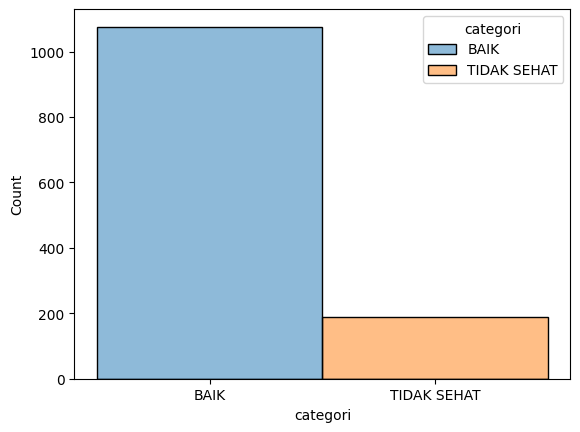

In [ ]:
sns.histplot(data = df, x = "categori", hue = "categori")

### 3.4. Cek Outliers

<Axes: xlabel='pm10'>

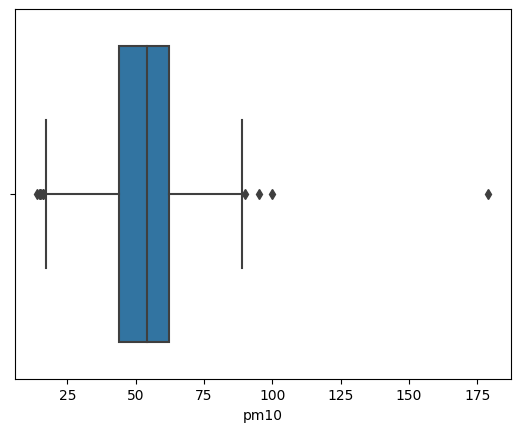

In [ ]:
sns.boxplot(data = df, x = "pm10")

<Axes: xlabel='pm25'>

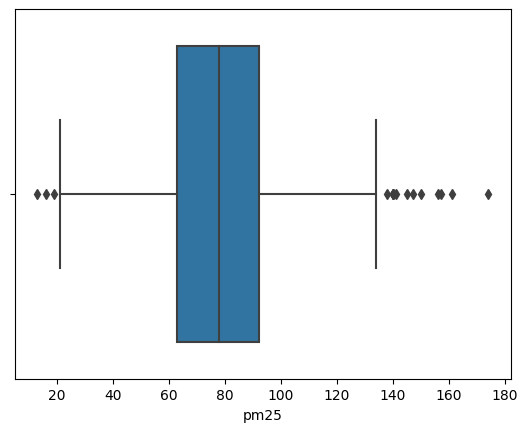

In [ ]:
sns.boxplot(data = dataset, x = "pm25")

<Axes: xlabel='so2'>

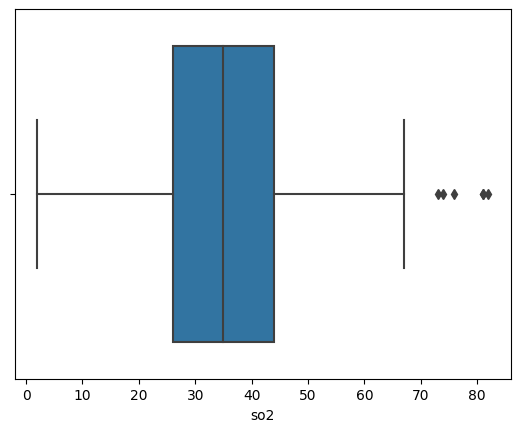

In [ ]:
sns.boxplot(data = dataset, x = "so2")

<Axes: xlabel='co'>

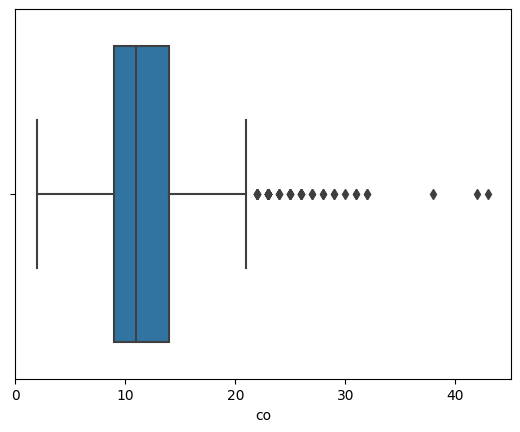

In [ ]:
sns.boxplot(data = dataset, x = "co")

<Axes: xlabel='o3'>

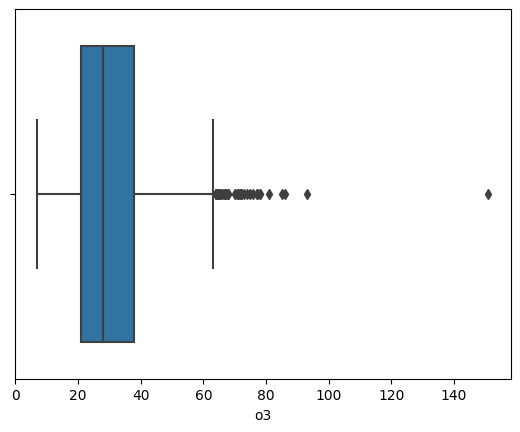

In [ ]:
sns.boxplot(data = dataset, x = "o3")

<Axes: xlabel='no2'>

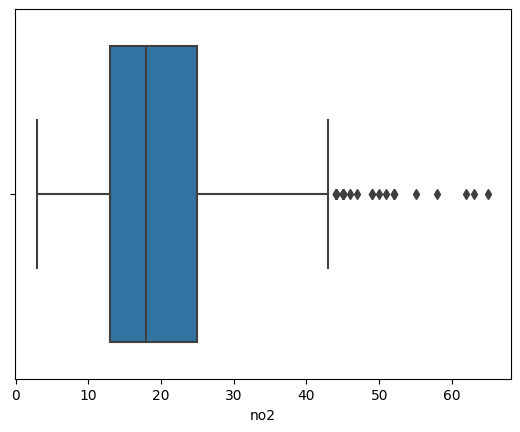

In [ ]:
sns.boxplot(data = dataset, x = "no2")

1. Missing value handling
-  pm10      : mean kelas
-  pm25      : mean kelas
-  so2       : mean
-  co        : median
-  o3        : median
-  no2       : median

3. Balancing label baik dan tidak baik

4. Outlier removal